# Exploratory Data Analysis for NYC Citi Bike 

In this project, I have tried to perform Exploratory Data Analysis using the NYC Citi Bike data. I have tried to answer two main questions in this project.
1. How does trip length vary based on trip start time?
2. Which bike stations are most popular to start trips from?

I have used pandas, numpy and seaborn libraries for this project. Have performed joining operation and used folium for data visualization.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\amuly\Desktop\New folder\projects\citi_bike_trip_data.csv')

# What is this data about?

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1


In [5]:
df.shape

(40575, 15)

In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [7]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,822.374640,449.396155,40.735229,-73.991093,450.073370,40.734885,-73.991212,17634.191547,1.137671
std,984.000376,362.462577,0.019599,0.012346,369.780126,0.019600,0.012483,1703.451047,0.527477
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14531.000000,0.000000
25%,408.000000,306.000000,40.721816,-74.000264,305.000000,40.721816,-74.001497,16146.000000,1.000000
50%,638.000000,405.000000,40.737050,-73.990765,404.000000,40.736529,-73.990931,17651.000000,1.000000
75%,1028.000000,487.000000,40.750450,-73.982050,487.000000,40.750224,-73.982050,19093.000000,1.000000
max,56629.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,20664.000000,2.000000


<AxesSubplot:xlabel='tripduration', ylabel='Count'>

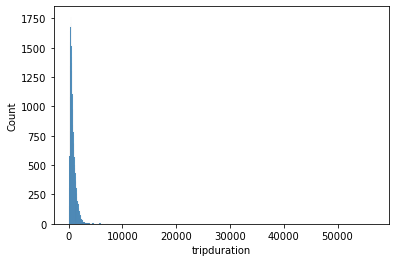

In [8]:
sns.histplot(df['tripduration'])

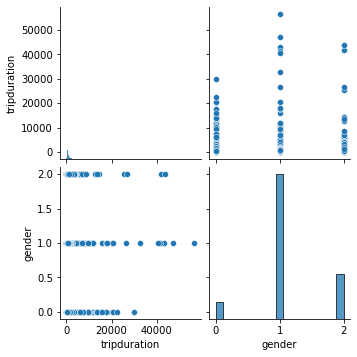

In [9]:
sns.pairplot(df[['tripduration','gender']])

In [10]:
num_subscriber = df['usertype'].loc[df['usertype']=='Subscriber'].count()
total = len(df)
print(round(num_subscriber/total*100, 2), '% of total riders on October 1st, 2013 is annual subscribers')

92.03 % of total riders on October 1st, 2013 is annual subscribers


# Q1: How does trip length vary based on trip start time?

In [11]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40570,273,2013-10-01 23:59:41,2013-10-02 00:04:14,537,Lexington Ave & E 24 St,40.740259,-73.984092,461,E 20 St & 2 Ave,40.735877,-73.982050,17503,Subscriber,1989,1
40571,563,2013-10-01 23:59:43,2013-10-02 00:09:06,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,437,Macon St & Nostrand Ave,40.680983,-73.950048,16048,Subscriber,1991,2
40572,490,2013-10-01 23:59:51,2013-10-02 00:08:01,470,W 20 St & 8 Ave,40.743453,-74.000040,404,9 Ave & W 14 St,40.740583,-74.005509,20006,Customer,\N,0
40573,1289,2013-10-01 23:59:53,2013-10-02 00:21:22,322,Clinton St & Tillary St,40.696192,-73.991218,311,Norfolk St & Broome St,40.717227,-73.988021,16577,Subscriber,1962,2


In [12]:
df['hour'] = df.starttime.apply(lambda x:x[11:13]).astype('str')

In [13]:
df['hour']

0        00
1        00
2        00
3        00
4        00
         ..
40570    23
40571    23
40572    23
40573    23
40574    23
Name: hour, Length: 40575, dtype: object

In [14]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,hour
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1,00
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0,00
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1,00
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1,00
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40570,273,2013-10-01 23:59:41,2013-10-02 00:04:14,537,Lexington Ave & E 24 St,40.740259,-73.984092,461,E 20 St & 2 Ave,40.735877,-73.982050,17503,Subscriber,1989,1,23
40571,563,2013-10-01 23:59:43,2013-10-02 00:09:06,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,437,Macon St & Nostrand Ave,40.680983,-73.950048,16048,Subscriber,1991,2,23
40572,490,2013-10-01 23:59:51,2013-10-02 00:08:01,470,W 20 St & 8 Ave,40.743453,-74.000040,404,9 Ave & W 14 St,40.740583,-74.005509,20006,Customer,\N,0,23
40573,1289,2013-10-01 23:59:53,2013-10-02 00:21:22,322,Clinton St & Tillary St,40.696192,-73.991218,311,Norfolk St & Broome St,40.717227,-73.988021,16577,Subscriber,1962,2,23


<AxesSubplot:xlabel='hour', ylabel='tripduration'>

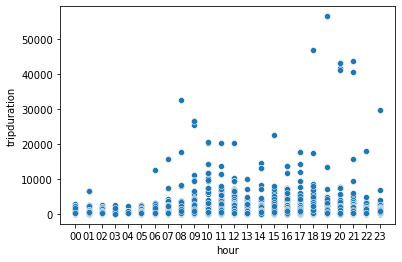

In [15]:
#Visualising the correlation
sns.scatterplot(x = 'hour', y = 'tripduration', data = df)

<AxesSubplot:xlabel='hour', ylabel='tripduration'>

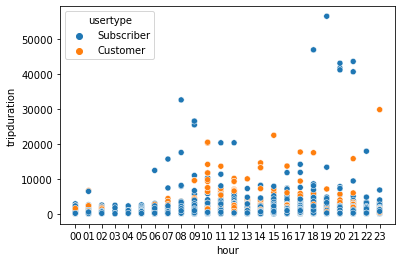

In [16]:
sns.scatterplot(x = 'hour', y = 'tripduration', data = df, hue = 'usertype')

# Q2: Which bike stations are most popular to start trips from?

In [17]:
df2 = df.groupby(['start station id']).size().reset_index(name='counts')


In [18]:
temp = df.drop_duplicates('start station id')

In [19]:
#left join
df2 = pd.merge(df2, temp[['start station id', 'start station name', 
                          'start station latitude','start station longitude']],
               how = 'left', on = ['start station id'])
df2

,start station id,counts,start station name,start station latitude,start station longitude
0,72,112,W 52 St & 11 Ave,40.767272,-73.993929
1,79,91,Franklin St & W Broadway,40.719116,-74.006667
2,82,39,St James Pl & Pearl St,40.711174,-74.000165
3,83,52,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
4,116,213,W 17 St & 8 Ave,40.741776,-74.001497
...,...,...,...,...,...
323,2017,127,E 43 St & 2 Ave,40.750224,-73.971214
324,2021,228,W 45 St & 8 Ave,40.759291,-73.988597
325,2022,105,E 59 St & Sutton Pl,40.758491,-73.959206
326,2023,74,E 55 St & Lexington Ave,40.759681,-73.970314


In [20]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [21]:
import folium

In [22]:
#initialize a map
m = folium.Map(location=[40.693261,-73.968896],tiles='OpenStreetMap',zoom_start=14.0)

In [23]:
m

In [24]:
for i in range(0, len(df2)):
    folium.Circle(
        location = [df2.iloc[i]['start station latitude'], df2.iloc[i]['start station longitude']],
        popup = df2.iloc[i]['start station name'],
        radius = float(df2.iloc[i]['counts'])/2,
        color = 'red',
        fill = True, fill_color = 'red'        
    ).add_to(m)

In [25]:
m